# Ładowanie bibliotek

In [1]:
#przetwarzanie danych
import pandas as pd
import numpy as np

#wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

# model
from sklearn.linear_model import LogisticRegression

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score


# Ładowanie danych

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv', sep=';', header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.loc[df.duplicated(subset=None, keep=False), :]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [6]:
df.rename(columns = {'default payment next month':'default'}, inplace = True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

# Eksploracyjna analiza danych

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df['default'].value_counts(normalize=True)


0    0.7788
1    0.2212
Name: default, dtype: float64

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default'],
      dtype='object')

In [10]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

Wiek

<AxesSubplot: xlabel='index', ylabel='AGE'>

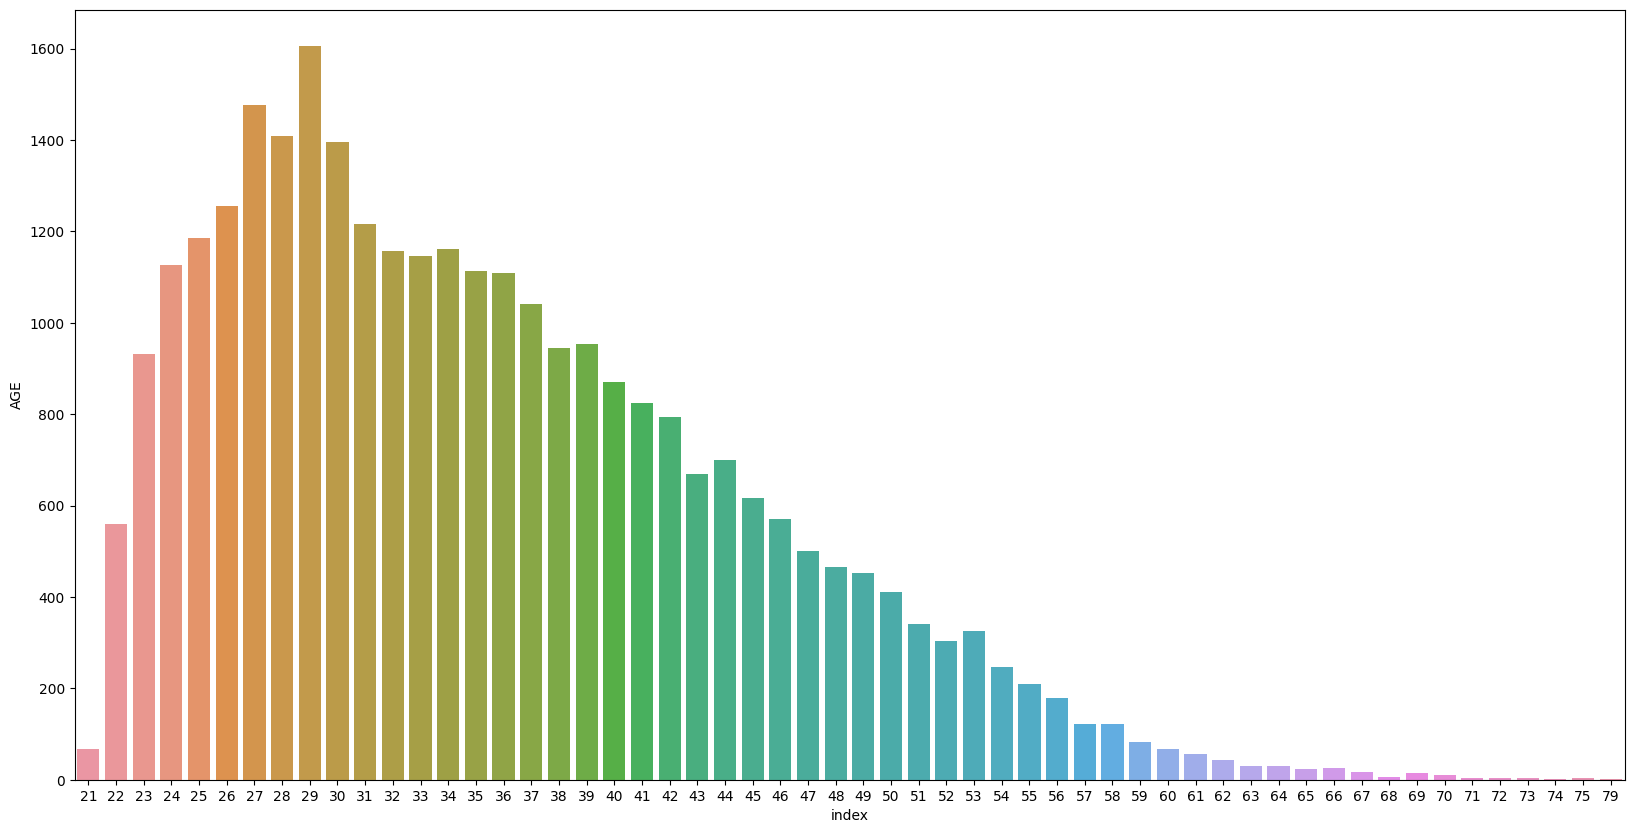

In [11]:
fig = plt.subplots(figsize=(20,10))
age_df=df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age_df,orient='v')

<AxesSubplot: xlabel='default', ylabel='AGE'>

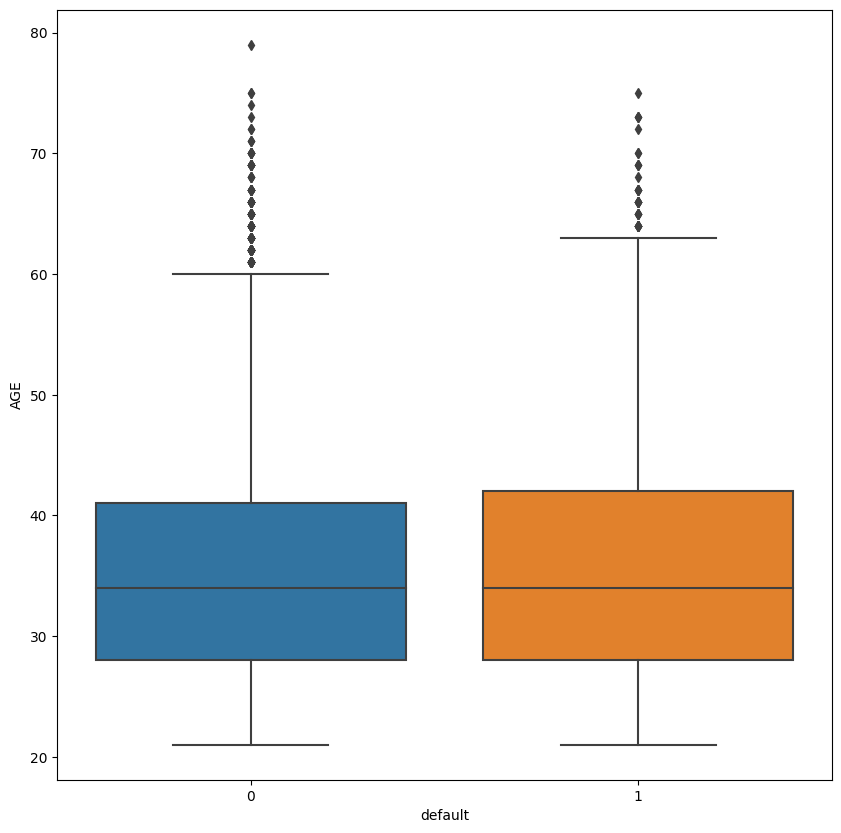

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x="default", y="AGE", data=df)

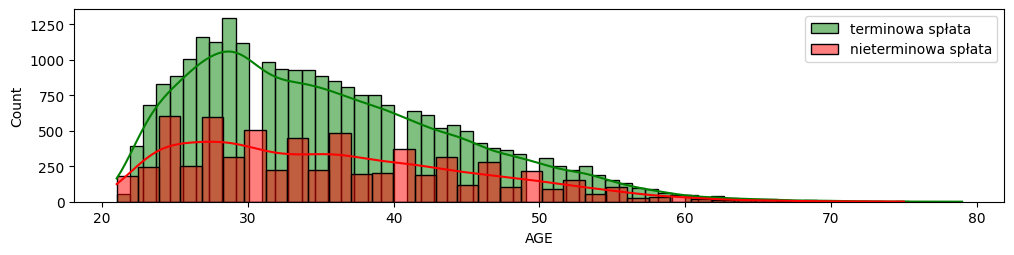

In [13]:
plt.figure(figsize=(12, 2.5))
sns.histplot(df.loc[df['default']==0, 'AGE'], kde=True, color='green', label='terminowa spłata')
sns.histplot(df.loc[df['default']==1, 'AGE'], kde=True, color='red', label='nieterminowa spłata')
plt.legend(loc='upper right')
plt.show()

Kwota rozliczeniowa (billing amount)

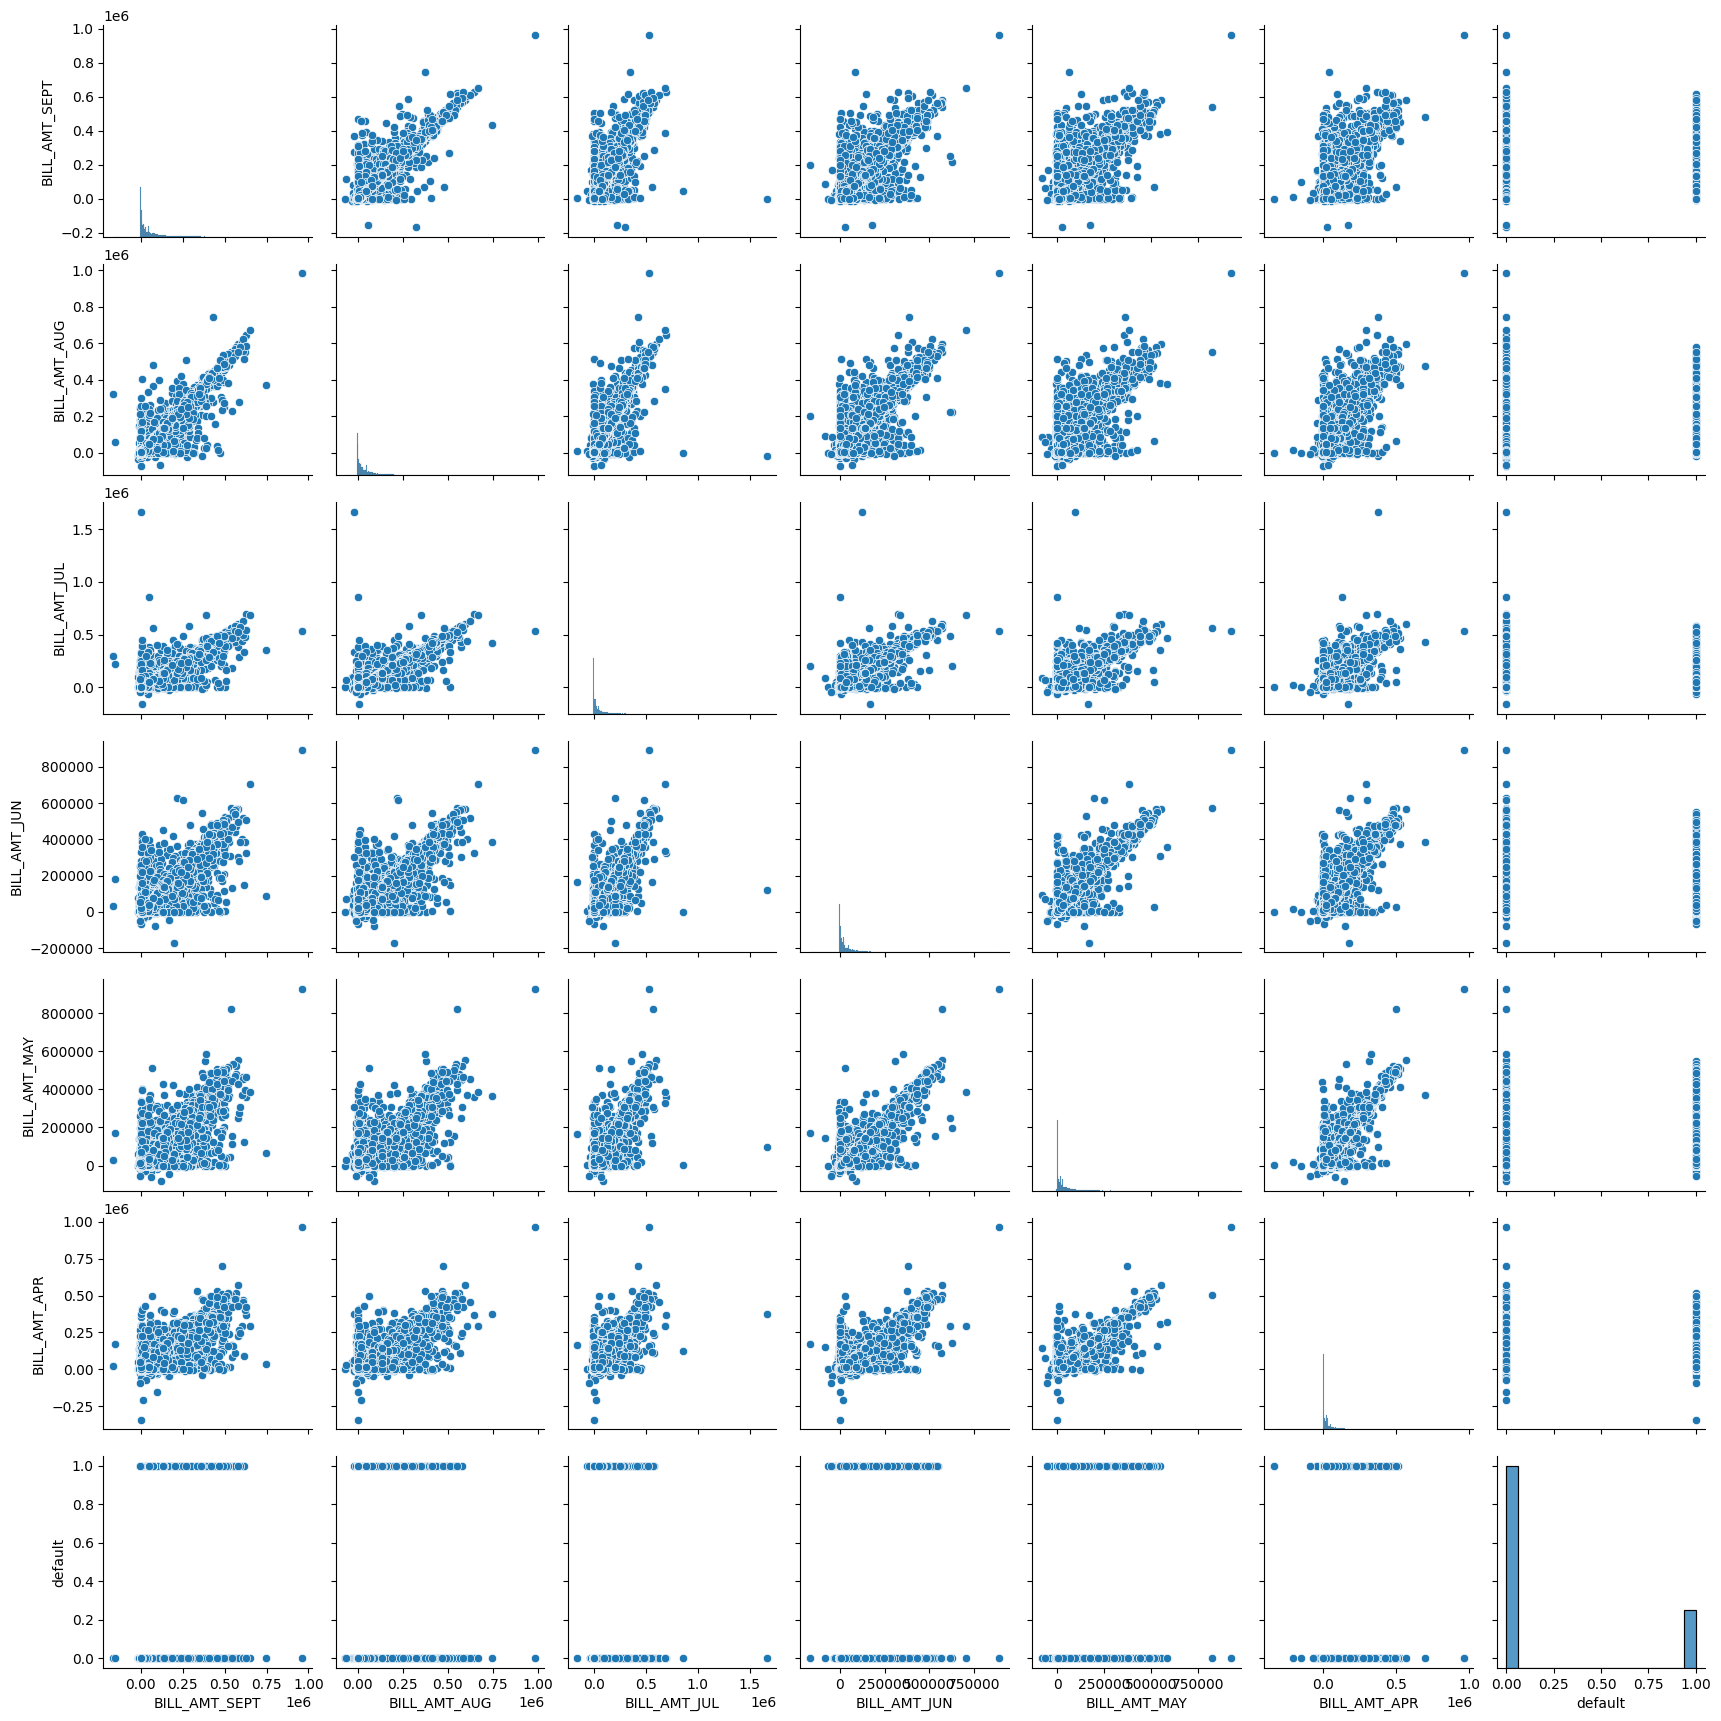

In [14]:
sns.pairplot(data = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'default']])


Kwota udzielonego kredytu

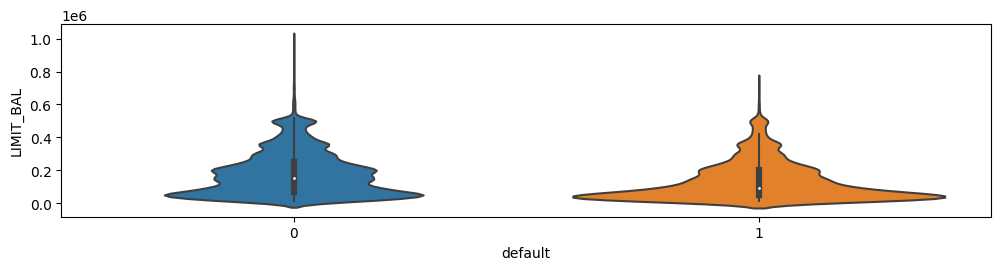

In [15]:
plt.figure(figsize=(12, 2.5))
sns.violinplot(x='default',y='LIMIT_BAL', data=df)
plt.show()

Historia przeszłych spłat

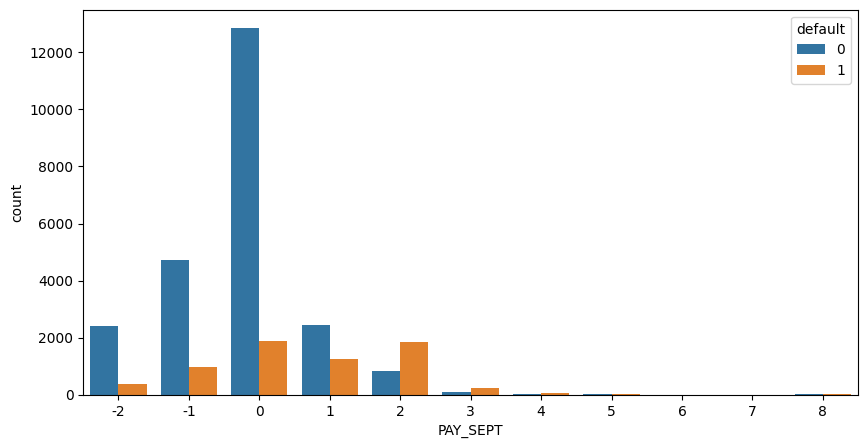

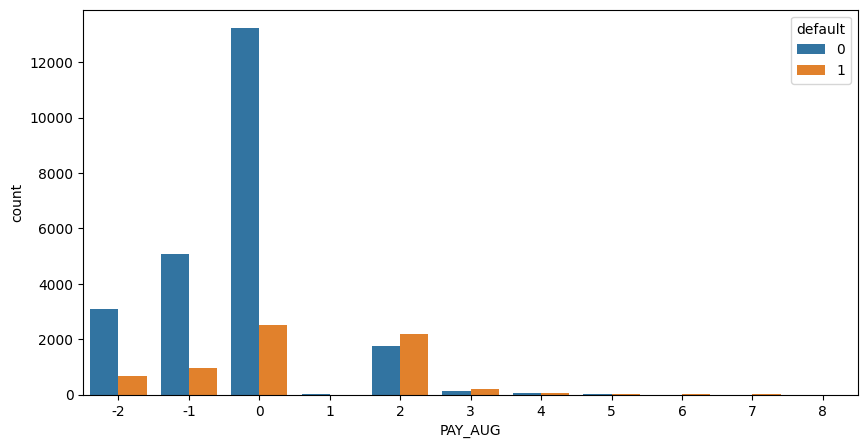

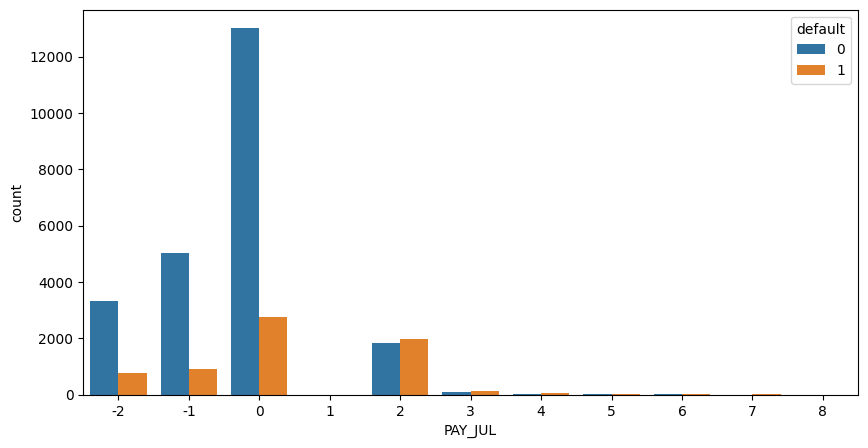

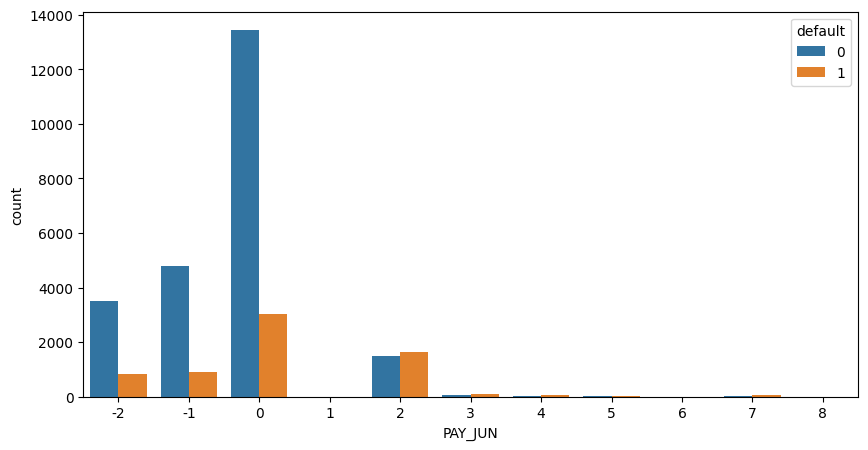

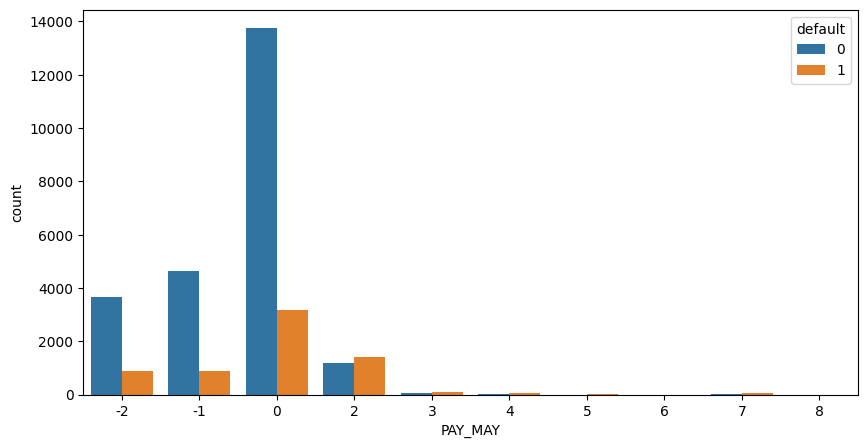

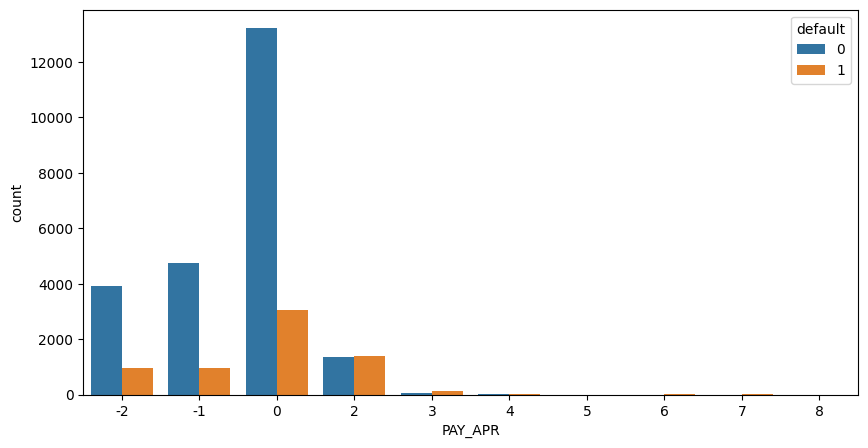

In [16]:
for col in ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'default', data = df)
    plt.show()

Kwoty spłaconego kredytu

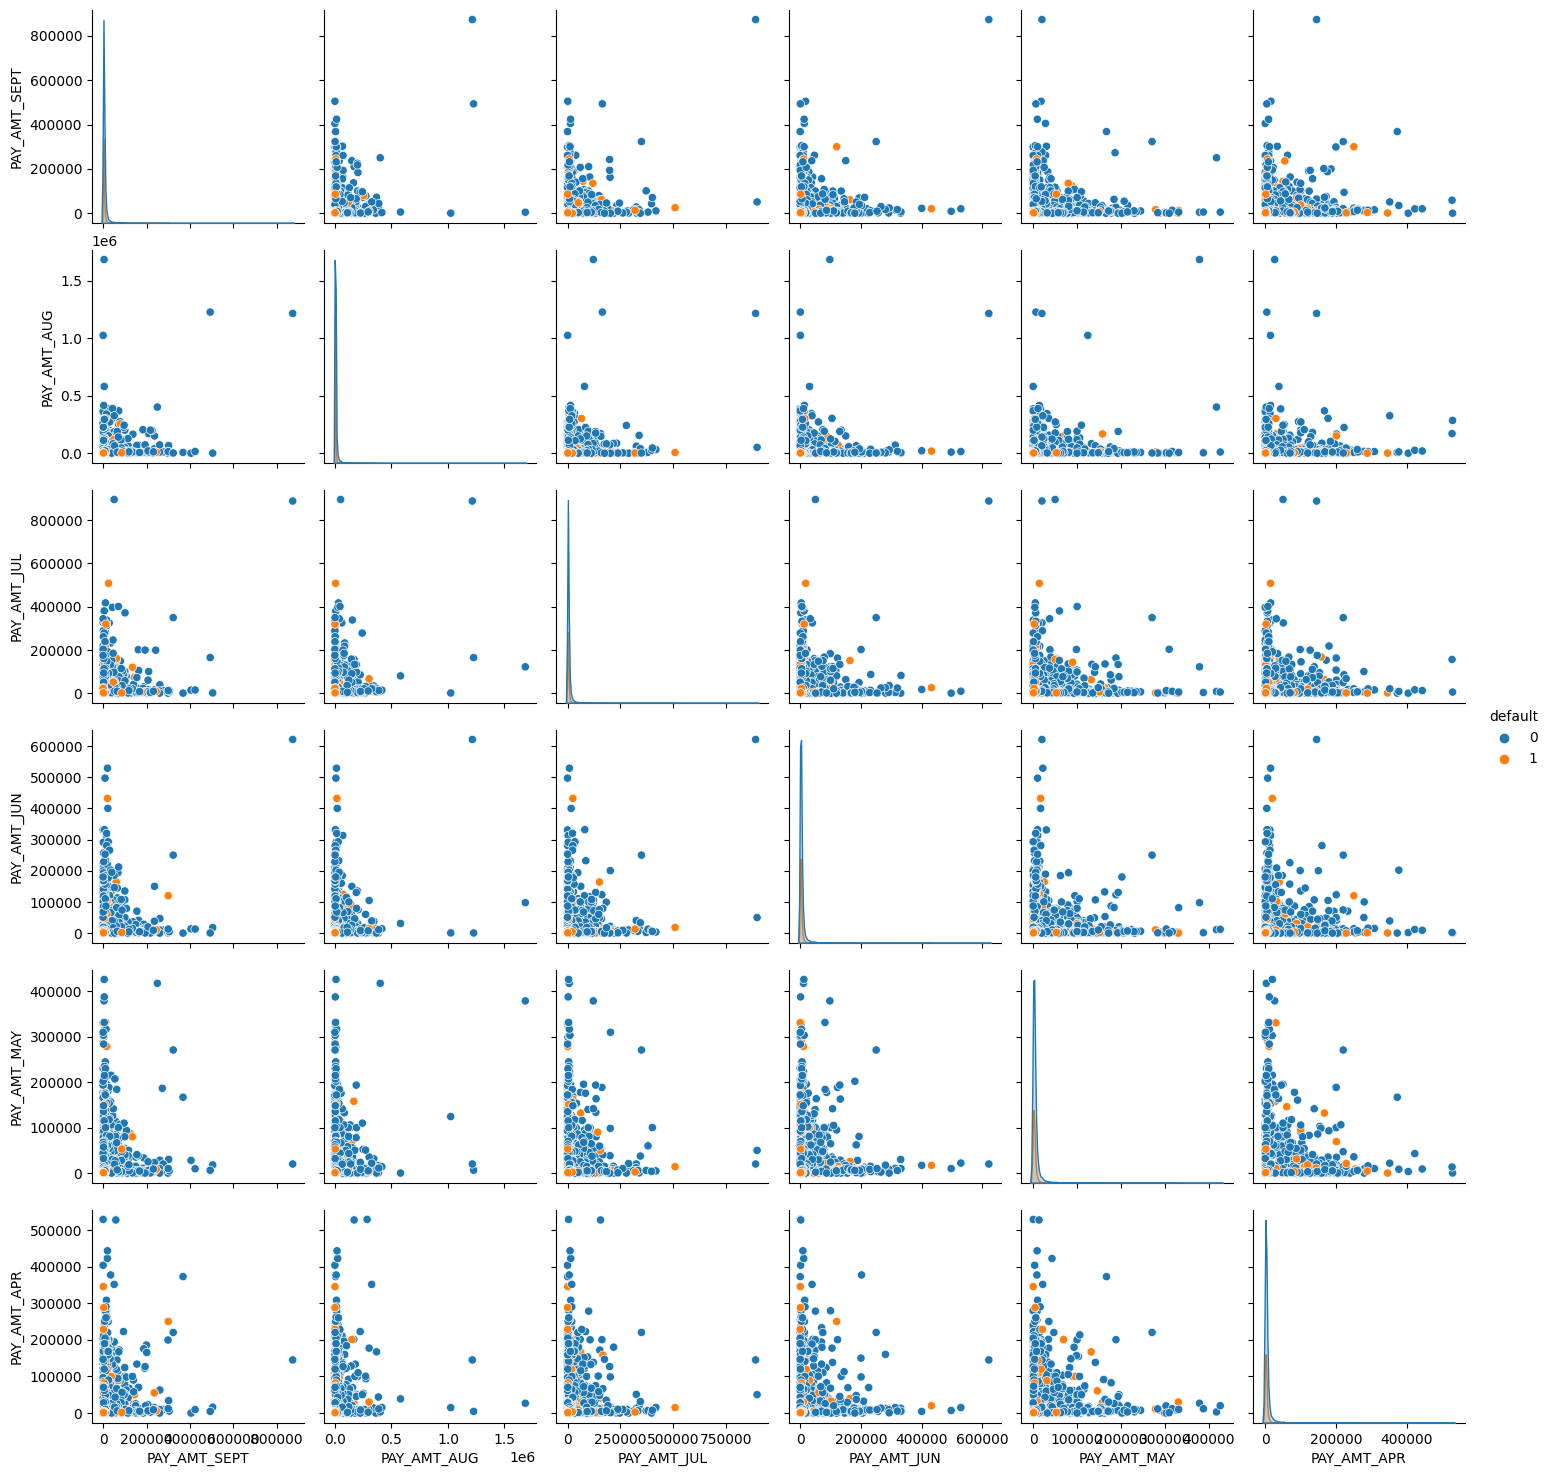

In [17]:
sns.pairplot(data = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default']], hue='default')

Płeć, wykształcenie, status cywilny

In [18]:
df_dem = df[['SEX', 'EDUCATION', 'MARRIAGE', 'default']]
df_dem.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_dem.head()

C:\Users\lukpy\AppData\Local\Temp\ipykernel_4624\216412076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dem.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},


,SEX,EDUCATION,MARRIAGE,default
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0


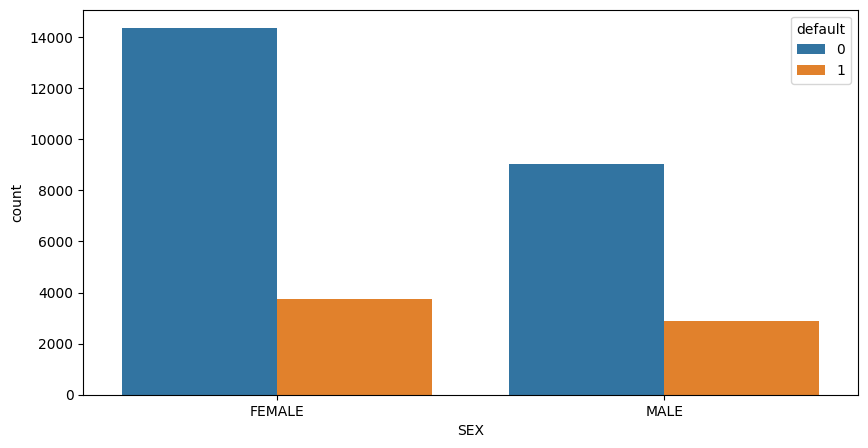

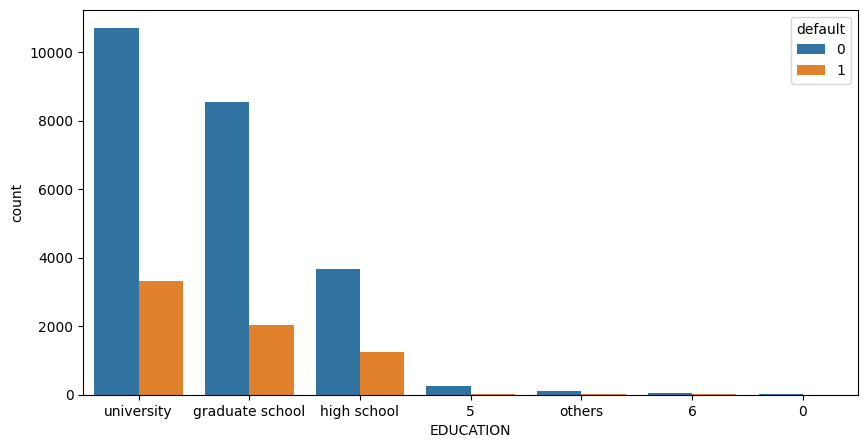

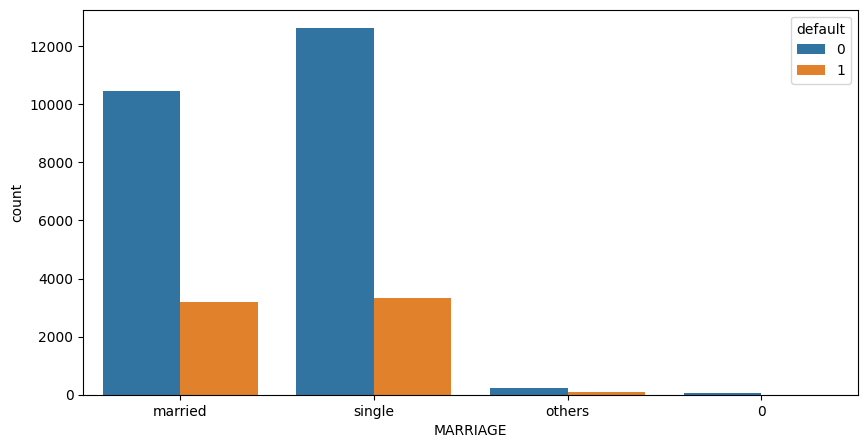

In [19]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, hue = 'default', data = df_dem)

# Inżynieria cech

In [20]:
df_eng = df.copy()

In [21]:
df_eng.drop(['ID'], axis=1, inplace=True)

In [22]:
df_eng.loc[~df_eng['EDUCATION'].isin([1, 2, 3]), 'EDUCATION'] = 4

In [23]:
df_eng.loc[~df_eng['MARRIAGE'].isin([1, 2]), 'MARRIAGE'] = 3

In [24]:
age_df = pd.read_csv('age.csv', sep=';')
age_df.head()

,AGE_RAW,AGE_CAT
0,21,21 - 24
1,22,21 - 24
2,23,21 - 24
3,24,21 - 24
4,25,25 - 29


In [25]:
age_dict = dict(zip(age_df['AGE_RAW'], age_df['AGE_CAT']))
print(age_dict)

{21: '21 - 24', 22: '21 - 24', 23: '21 - 24', 24: '21 - 24', 25: '25 - 29', 26: '25 - 29', 27: '25 - 29', 28: '25 - 29', 29: '25 - 29', 30: '30 - 34', 31: '30 - 34', 32: '30 - 34', 33: '30 - 34', 34: '30 - 34', 35: '35 - 39', 36: '35 - 39', 37: '35 - 39', 38: '35 - 39', 39: '35 - 39', 40: '40 - 44', 41: '40 - 44', 42: '40 - 44', 43: '40 - 44', 44: '40 - 44', 45: '45 - 49', 46: '45 - 49', 47: '45 - 49', 48: '45 - 49', 49: '45 - 49', 50: '50 - 54', 51: '50 - 54', 52: '50 - 54', 53: '50 - 54', 54: '50 - 54', 55: '55 - 59', 56: '55 - 59', 57: '55 - 59', 58: '55 - 59', 59: '55 - 59', 60: '60 plus', 61: '60 plus', 62: '60 plus', 63: '60 plus', 64: '60 plus', 65: '60 plus', 66: '60 plus', 67: '60 plus', 68: '60 plus', 69: '60 plus', 70: '60 plus', 71: '60 plus', 72: '60 plus', 73: '60 plus', 74: '60 plus', 75: '60 plus', 76: '60 plus', 77: '60 plus', 78: '60 plus', 79: '60 plus'}


In [26]:
df_eng['AGE_CAT'] = df_eng['AGE'].map(age_dict)

In [27]:
df_eng

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,AGE_CAT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,21 - 24
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,25 - 29
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30 - 34
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,35 - 39
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,55 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,35 - 39
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,40 - 44
29997,30000,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,35 - 39
29998,80000,1,3,1,41,1,-1,0,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,40 - 44


In [28]:
df_eng.drop(['AGE'], axis=1, inplace=True)

In [29]:
df_eng.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,AGE_CAT
0,20000,2,2,1,2,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,21 - 24
1,120000,2,2,2,-1,2,0,0,0,2,...,3455,3261,0,1000,1000,1000,0,2000,1,25 - 29
2,90000,2,2,2,0,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,30 - 34
3,50000,2,2,1,0,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,35 - 39
4,50000,1,2,1,-1,0,-1,0,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,55 - 59


# Przygotowanie zbiorów do modelowania

In [30]:
X = df_eng.drop(['default'], axis=1).copy()
y = df_eng['default'].copy()

In [31]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG',
       'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR','AGE_CAT']
num_features = ['LIMIT_BAL', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666, stratify=y)

In [33]:
cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

In [34]:
num_preparation = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('power_transform', PowerTransformer()),
    ('scaler', StandardScaler()),
])

In [35]:
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

# Ewaluacja modeli

In [36]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)

    
    return metrics_dataframe

# Klasyfikacja za pomocą regresji logistycznej

In [37]:
model_pipeline_lr = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(solver='saga', max_iter=10))])
model_pipeline_lr.fit(X_train, y_train)


D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
D:\Kodilla\kurs_pythona\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
D:\Kodilla\kurs_pythona\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures(degree=3)),
                                                                  ('power_transform',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'BILL_AMT_SEPT',
                                                   'BILL_AMT_AUG',
                                                   'BILL_AMT_JUL',
                                                   'BILL_AMT_JUN',
                                                   'BILL_AMT_MAY',
                                                   'BILL_AMT_APR',
                                                   'PAY_AMT_SEPT',
                                                   'PAY_AMT_AUG', 'PAY_AMT_JUL',
                                                   'PAY_AMT_JUN', 'PAY_AMT_MAY',
                                                   'PAY_AMT_APR']),
                                                 ('categorical_preprocessing',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_SEPT',
                                                   'PAY_AUG', 'PAY_JUL',
                                                   'PAY_JUN', 'PAY_MAY',
                                                   'PAY_APR', 'AGE_CAT'])])),
                ('model', LogisticRegression(max_iter=10, solver='saga'))])

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4673
           1       0.44      0.34      0.38      1327

    accuracy                           0.76      6000
   macro avg       0.63      0.61      0.62      6000
weighted avg       0.74      0.76      0.75      6000



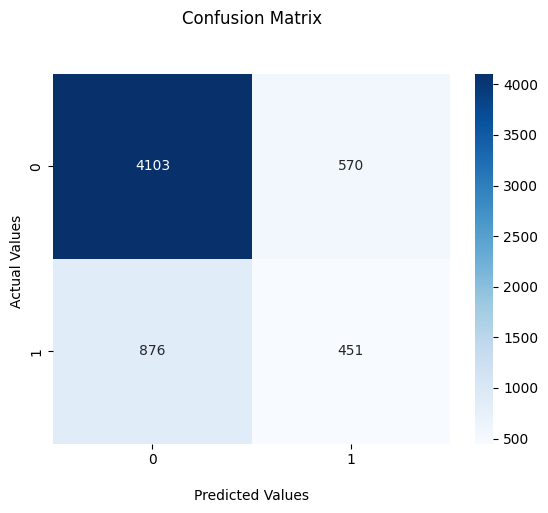

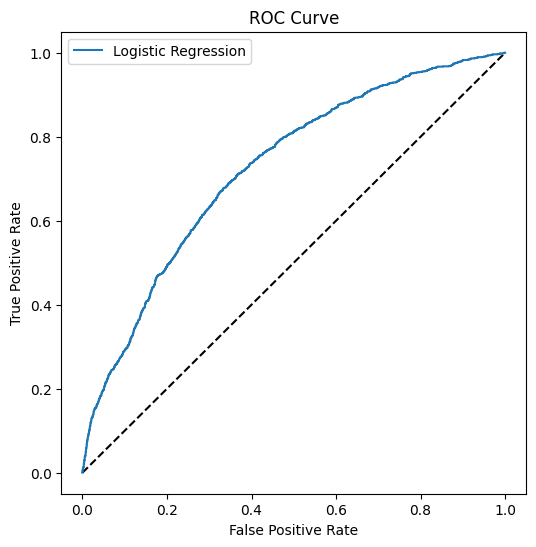

C:\Users\lukpy\AppData\Local\Temp\ipykernel_4624\665235130.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.384157,0.724219


In [38]:
calculate_metrics(model_pipeline_lr, 'Logistic Regression', X_test, y_test)

In [39]:
list(model_pipeline_lr.get_params().keys())

['memory',
 'steps',
 'verbose',
 'preprocessor',
 'model',
 'preprocessor__n_jobs',
 'preprocessor__remainder',
 'preprocessor__sparse_threshold',
 'preprocessor__transformer_weights',
 'preprocessor__transformers',
 'preprocessor__verbose',
 'preprocessor__verbose_feature_names_out',
 'preprocessor__numeric_preprocessing',
 'preprocessor__categorical_preprocessing',
 'preprocessor__numeric_preprocessing__memory',
 'preprocessor__numeric_preprocessing__steps',
 'preprocessor__numeric_preprocessing__verbose',
 'preprocessor__numeric_preprocessing__polynomial_features',
 'preprocessor__numeric_preprocessing__power_transform',
 'preprocessor__numeric_preprocessing__scaler',
 'preprocessor__numeric_preprocessing__polynomial_features__degree',
 'preprocessor__numeric_preprocessing__polynomial_features__include_bias',
 'preprocessor__numeric_preprocessing__polynomial_features__interaction_only',
 'preprocessor__numeric_preprocessing__polynomial_features__order',
 'preprocessor__numeric_prep

In [40]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features': [1, 3],
    'model__C': [0.01, 1, 2],
    'model__l1_ratio': [0, 0.5, 1],
}

In [41]:
grid_search = GridSearchCV(model_pipeline_lr, 
                           params,
                           cv=5, 
                           n_jobs=-1, 
                           verbose=10, 
                           scoring='f1_macro', 
                           error_score= 'raise')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_pipeline_lr_best = grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '1' (type <class 'int'>) doesn't